In [9]:
from sagas.nlu.anal import delegator
f=delegator.es('Nuestro horario es de nueve a cinco.')
f.draw()

root: nueve (nueve, num)
|-- nsubj: horario (horario, noun)
|   +-- det: Nuestro (nuestro, det)
|-- cop: es (ser, aux)
|-- case: de (de, adp)
|-- compound: cinco (cinco, num)
|   +-- case: a (a, adp)
+-- punct: . (., punct)


In [16]:
type(f.model()).__name__, f.as_desc().desc.text

('Desc', 'nueve')

In [20]:
desc=f.as_desc()
if desc:
    print(desc.subj.text, desc.subj.spec())

horario schedule


In [2]:
(f/'nsubj').draw()

nsubj: horario (horario, noun)
+-- det: Nuestro (nuestro, det)


In [3]:
len(f.doc.children)

1

In [4]:
f.doc.root

AnalNode(dependency_relation='root', doc=Doc(doc=<sagas.nlu.uni_jsonifier.JsonifySentImpl object at 0x122ebb630>, engine='stanza_western', extens=<sagas.nlu.anal_data_types.ExtensionHolder object at 0x122ebbc50>, lang='es', sents='Nuestro horario es de nueve a cinco.'), entity=['O'], extens=<sagas.nlu.anal_data_types.ExtensionHolder object at 0x122ebba90>, feats='NumType=Card|Number=Plur', governor=0, index=5, lang='es', lemma='nueve', name='root', position=(22, 27), segments=[], term={}, text='nueve', tok=<JsonifyWordImpl index=5;text=nueve;lemma=nueve;upos=NUM;xpos=NUM;feats=NumType=Card|Number=Plur;governor=0;dependency_relation=root>, upos='NUM', xpos='NUM')

In [5]:
delegator.doc('es')

sagas.nlu.anal.Doc

In [6]:
delegator.node('tr')

sagas.nlu.extensions.lang_tr.AnalNode_tr

In [7]:
from sagas.conf.conf import cf
cf.pipelines('es')

[sagas.nlu.anal_viz.AnalViz]

,index,text,lemma,upos,xpos,entity
0,1,Nuestro,nuestro,DET,DET,[O]
1,2,horario,horario,NOUN,NOUN,[O]
2,3,es,ser,AUX,AUX,[O]
3,4,de,de,ADP,ADP,[O]
4,5,nueve,nueve,NUM,NUM,[O]
5,6,a,a,ADP,ADP,[O]
6,7,cinco,cinco,NUM,NUM,[O]
7,8,.,.,PUNCT,PUNCT,[O]


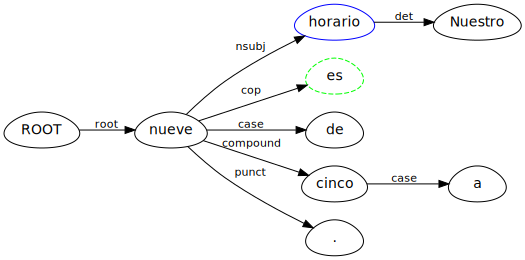

In [8]:
f.doc._.graph()

In [21]:
from sagas.nlu.anal import delegator
f=delegator.pt('Ele trabalha para a imprensa.')
f.draw()

root: trabalha (trabalhar, verb)
|-- nsubj: Ele (ele, pron)
|-- obl: imprensa (imprensa, noun)
|   |-- case: para (para, adp)
|   +-- det: a (o, det)
+-- punct: . (., punct)


In [26]:
behave=f.as_behave()
if behave:
    print(behave.behave.text, behave.behave.spec())

trabalha work


In [29]:
from sagas.nlu.utils import fix_sents
import pandas as pd
def get_corpus(lang, chapter):
    dfjson = pd.read_json(f'~/pi/stack/crawlers/langcrs/all_{lang}.json')
    ch=dfjson[dfjson['chapter'].str.match(chapter)]
    rs=[]
    for i, (sent,ref) in enumerate(zip(ch['translate'], ch['text'])):
        rs.append(fix_sents(sent, lang))
    return rs

rs=get_corpus('pt', 'At school')
rs

['Onde é que estamos?',
 'Nós estamos na escola.',
 'Nós temos aulas.',
 'Estes são os alunos.',
 'Esta é a professora.',
 'Esta é a turma.',
 'O que é que fazemos?',
 'Nós estudamos',
 'Nós aprendemos uma língua.',
 'Eu aprendo inglês.',
 'Tu aprendes espanhol.',
 'Ele aprende alemão.',
 'Nós aprendemos francês.',
 'Vocês aprendem italiano.',
 'Eles aprendem russo.',
 'Aprender línguas é muito interessante.',
 'Nós queremos entender as pessoas.',
 'Nós queremos falar com as pessoas.']

In [38]:
for text in rs:
    f=delegator.pt(text)
    behave=f.as_behave()
    if behave:
        print('-', text, '-'*10)
        print(behave.behave.text, behave.behave.spec(), 
              behave.obj.spec() if behave.obj else '_o',
              behave.iobj.spec() if behave.iobj else '_i'
             )

- Nós temos aulas. ----------
temos have course _i
- O que é que fazemos? ----------
fazemos make  _i
- Nós estudamos ----------
estudamos study _o _i
- Nós aprendemos uma língua. ----------
aprendemos learn language _i
- Eu aprendo inglês. ----------
aprendo learn english _i
- Tu aprendes espanhol. ----------
aprendes learn spanish _i
- Ele aprende alemão. ----------
aprende learn german _i
- Nós aprendemos francês. ----------
aprendemos learn french _i
- Vocês aprendem italiano. ----------
aprendem learn italian _i
- Eles aprendem russo. ----------
aprendem learn russian _i
- Aprender línguas é muito interessante. ----------
Aprender learn language _i
- Nós queremos entender as pessoas. ----------
queremos like know _i
- Nós queremos falar com as pessoas. ----------
queremos like state _i


In [58]:
from sagas.nlu.anal import delegator
from sagas.nlu.anal_expr import match
from sagas.nlu.anal_data_types import behave_, desc_, phrase_, rel_, path_, _, _1, _2

# f=delegator.pt('Nós estudamos.')
f=delegator.pt('Ele aprende alemão.')
f.draw()
print('verb:', f.as_behave().behave.spec())
r=match(f,
    # behave_(_, _1 << 'study', _2 << _, _), lambda arg, v1, v2: [v1.text, v2.text],
    behave_(_, _1 << 'study', _, _), lambda arg, v1: [v1.text],
    behave_(_, _1 << 'learn', _2 << _, _), lambda arg, v1, v2: [v1.text, v2.text, v2.spec()],
    _, None
    )
r

root: aprende (aprender, verb)
|-- nsubj: Ele (ele, pron)
|-- obj: alemão (alemão, noun)
+-- punct: . (., punct)
verb: learn


['aprende', 'alemão', 'german']

In [66]:
for text in rs:
    f=delegator.pt(text)
    if f.as_behave():
        r=match(f,
            behave_(_, _1 << 'study|学习', _2 << _, _), lambda arg, v1, v2: ['v.o', v1.text, v2.text],
            behave_(_, _1 << 'study|学习', _, _), lambda arg, v1: ['v', v1.text],
            _, None
            )
        if r:
            print(r)

['v', 'estudamos']
['v.o', 'aprendemos', 'língua']
['v.o', 'aprendo', 'inglês']
['v.o', 'aprendes', 'espanhol']
['v.o', 'aprende', 'alemão']
['v.o', 'aprendemos', 'francês']
['v.o', 'aprendem', 'italiano']
['v.o', 'aprendem', 'russo']
['v.o', 'Aprender', 'línguas']
